In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [69]:
import os
import os
import random
import re
from PIL import Image

DATA_PATH = 'C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/'
FRAME_PATH = "C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/x/"
MASK_PATH = "C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/"
NEW_MASK_PATH = "C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/"
len(os.listdir("C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/x"))

298

In [3]:
# Get all frames and masks, sort them, shuffle them to generate data sets.

all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)


all_frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[0-9]+', var)])
all_masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[0-9]+', var)])

In [4]:
grand_temp = []
for f1 in all_frames:
  temp = []
  for f2 in all_masks:
    if ord(f2[3]) == 95:
      f3 = f2[0:3] + '.bmp'
    elif ord(f2[4]) == 95:
      f3 = f2[0:4] + '.bmp'
    if f1 == f3:
      temp.append(f2)
  grand_temp.append(temp)
grand_temp

[['106_1.bmp', '106_2.bmp', '106_3.bmp', '106_4.bmp', '106_5.bmp'],
 ['108_1.bmp', '108_2.bmp', '108_3.bmp', '108_4.bmp'],
 ['109_1.bmp', '109_2.bmp', '109_3.bmp', '109_4.bmp', '109_5.bmp'],
 ['111_1.bmp', '111_2.bmp'],
 ['112_1.bmp', '112_2.bmp', '112_3.bmp', '112_4.bmp'],
 ['114_1.bmp', '114_2.bmp', '114_3.bmp'],
 ['201_1.bmp', '201_2.bmp', '201_3.bmp', '201_4.bmp', '201_5.bmp'],
 ['202_1.bmp',
  '202_2.bmp',
  '202_3.bmp',
  '202_4.bmp',
  '202_5.bmp',
  '202_6.bmp'],
 ['210_1.bmp', '210_2.bmp', '210_3.bmp', '210_4.bmp', '210_5.bmp'],
 ['212_1.bmp', '212_2.bmp'],
 ['213_1.bmp',
  '213_2.bmp',
  '213_3.bmp',
  '213_4.bmp',
  '213_5.bmp',
  '213_6.bmp'],
 ['214_1.bmp', '214_2.bmp'],
 ['215_1.bmp', '215_2.bmp', '215_3.bmp'],
 ['216_1.bmp', '216_2.bmp', '216_3.bmp', '216_4.bmp'],
 ['303_1.bmp', '303_2.bmp', '303_3.bmp', '303_4.bmp', '303_5.bmp'],
 ['306_1.bmp',
  '306_2.bmp',
  '306_3.bmp',
  '306_4.bmp',
  '306_5.bmp',
  '306_6.bmp',
  '306_7.bmp',
  '306_8.bmp',
  '306_9.bmp'],
 ['307

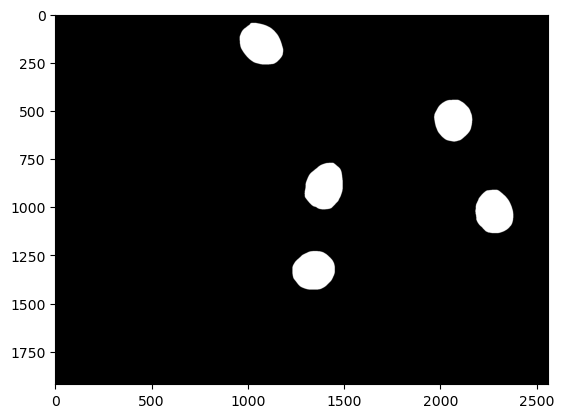

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


result = None

for pic in grand_temp[0]:
    path = MASK_PATH + pic
    mask_ = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Assuming masks are grayscale
    mask_ = mask_.astype("float32")
    
    # Accumulate only pixels above 20
    mask_above_20 = np.where(mask_ > 20, mask_, 0)
    
    if result is None:
        result = mask_above_20
    else:
        result += mask_above_20

# Rescale and display the accumulated result as an image
result = 255 * result
result = result.clip(0, 255).astype("uint8")
plt.imshow(result, cmap='gray')
plt.show()


In [26]:
import cv2
import numpy as np


result = None

for mak in grand_temp:
    for pic in mak:
        path = MASK_PATH + pic
        print(f"Reading image from: {path}")
        mask_ = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        if mask_ is None:
            print(f"Unable to read image at: {path}")
            continue

        mask_ = mask_.astype("float32")
        
        # Accumulate only pixels above 20
        mask_above_20 = np.where(mask_ > 20, mask_, 0)
        
        # Rescale the accumulated result
        current_result = 255 * mask_above_20
        current_result = current_result.clip(0, 255).astype("uint8")
        
        # Accumulate the current result
        if result is None:
            result = current_result
        else:
            result += current_result

    # Write the accumulated result after the inner loop
    if result is not None:
        cv2.imwrite(NEW_MASK_PATH + mak[0][:4] + ".bmp", result)
        print(f"Saved result to: {NEW_MASK_PATH + mak[0][:4]}.bmp")

    # Reset result for the next iteration
    result = None


Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/106_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/106_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/106_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/106_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/106_5.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/106_.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/108_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/108_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/108_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TC

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/306_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/306_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/306_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/306_9.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/306_.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/307_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/307_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/307_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/307_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TC

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1697_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1697_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1697_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1697_9.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1697_10.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1697_11.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1697.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1698_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1698_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/D

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1783_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1783_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1783_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1783_9.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1783_10.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1783.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1792_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1792_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1792_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Da

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1811_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1811_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1811_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1811_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1811_7.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1811.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1818_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1818_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1818_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Dat

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1864_3.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1864.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1867_1.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1867.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1872_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1872_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1872_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1872_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1872_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1934_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1934_6.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1934.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1935_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1935_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1935_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1935_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1935_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1935_6.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data D

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1991_10.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1991_11.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1991_12.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1991.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1997_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1997_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1997_4.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/1997.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/1998_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SE

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2048_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2048_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2048_8.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2048.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2050_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2050_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2050_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2050_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2050_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Dat

Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2097.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2098_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2098_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2098_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2098_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2098_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2098_6.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2098.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2101_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5

Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2121.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2128_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Dat

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_9.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_10.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2148_11.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2148.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/D

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2196_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2196_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2196_9.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2196.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2202_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2202_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2202_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2202_4.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2202.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2271_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2271_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2271_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2271_8.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2271.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2272_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2272_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2272_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2272_6.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data D

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_10.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_11.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_12.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2308_13.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Dat

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2346_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2346_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2346_9.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2346_10.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2346.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2349_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2349_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2349_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2349_6.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data 

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2427_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2427_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2427_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2427_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2427_8.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/2427.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2431_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2431_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/2431_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Dat

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9361_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9361_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9361_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9361_9.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9361.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9362_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9362_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9362_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9362_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Dat

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9427_3.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9427.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9428_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9428_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9428_3.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9428.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9431_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9431_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9431_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_6.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_7.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_8.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9521_9.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9521.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Dat

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9650_3.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9650.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9652_1.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9652.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9653_2.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9653.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9656_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9656_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9656_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/S

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9674_10.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9674.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9678_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9678_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9678_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9678_4.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9678_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9678_6.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9678.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9724_5.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9724.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9731_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9731_2.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9731.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9734_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9734_3.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9734.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9736_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/S

Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9797_5.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9797_6.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9797.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9809_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9809_2.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9809_3.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9809_4.bmp
Saved result to: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/9809.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/y/9815_1.bmp
Reading image from: C:/Users/Karthik/Desktop/Sem 4/SEM 5

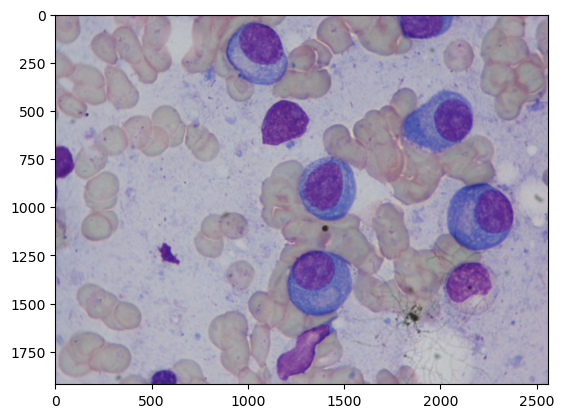

In [2]:
# Load the original images
x_files = os.listdir("C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/x")

# x_images = []
x_image = Image.open(os.path.join("C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/x/106.bmp"))
x_image = np.array(x_image)
# x_images.append(x_image)
plt.imshow(x_image)

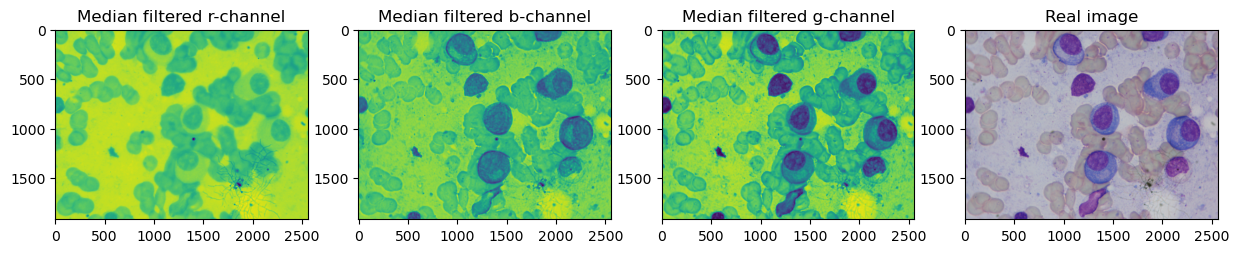

In [5]:
import cv2
import numpy as np

# Function to apply median filter to each channel of an image
def median_filter_channels_g(image):
    # Split the image into R, G, and B channels
    b, g, r = cv2.split(image)
    g_median = cv2.medianBlur(g, 7)
    return g_median

def median_filter_channels_b(image):
    # Split the image into R, G, and B channels
    b, g, r = cv2.split(image)
    b_median = cv2.medianBlur(b, 7)
    return b_median

def median_filter_channels_r(image):
    # Split the image into R, G, and B channels
    b, g, r = cv2.split(image)
    r_median = cv2.medianBlur(r, 7)
    return r_median


# Apply median filter to each channel for each image
filtered_images_channels_r = median_filter_channels_r(x_image)
filtered_images_channels_b = median_filter_channels_b(x_image) 
filtered_images_channels_g = median_filter_channels_g(x_image)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title('Median filtered r-channel')
plt.imshow(filtered_images_channels_r)

plt.subplot(1, 4, 2)
plt.title('Median filtered b-channel')
plt.imshow(filtered_images_channels_b)

plt.subplot(1, 4, 3)
plt.title('Median filtered g-channel')
plt.imshow(filtered_images_channels_g)

plt.subplot(1, 4, 4)
plt.title('Real image')
plt.imshow(x_image)

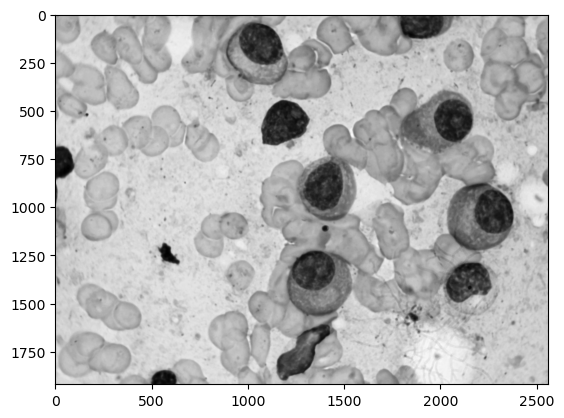

In [27]:
img = filtered_images_channels_g
plt.imshow(img, cmap='gray')

# Cytoplasm segmentation using watershed algorithm on blue channel image

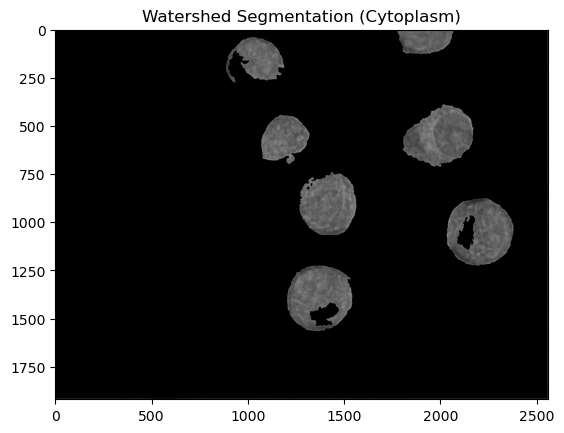

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed_segmentation_blue(image):
    if len(image.shape) == 2:
        b = image
    elif len(image.shape) == 3 and image.shape[2] == 3:
        b, _, _ = cv2.split(image)
    else:
        raise ValueError("Invalid image format")
    image_rgb = cv2.cvtColor(b, cv2.COLOR_GRAY2BGR)
    _, thresh = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    _, markers = cv2.connectedComponents(sure_fg)

    markers = markers + 1

    markers[unknown == 255] = 0

    cv2.watershed(image_rgb, markers)

    image_rgb[markers == 1] = [0, 0, 0]
   
    
    return image_rgb

cyto = watershed_segmentation_blue(filtered_images_channels_b)
plt.imshow(cv2.cvtColor(neu, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation (Cytoplasm)')
plt.show()

Shape of y_true: (1920, 2560)
Shape of y_pred: (1920, 2560, 3)


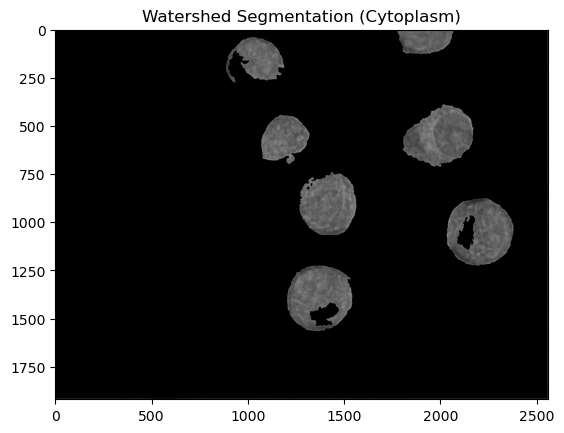

True Positive (TP): 24038
True Negative (TN): 3963676
False Positive (FP): 522895
False Negative (FN): 404591
Accuracy: 0.811302490234375
Precision: 0.04395053873143511


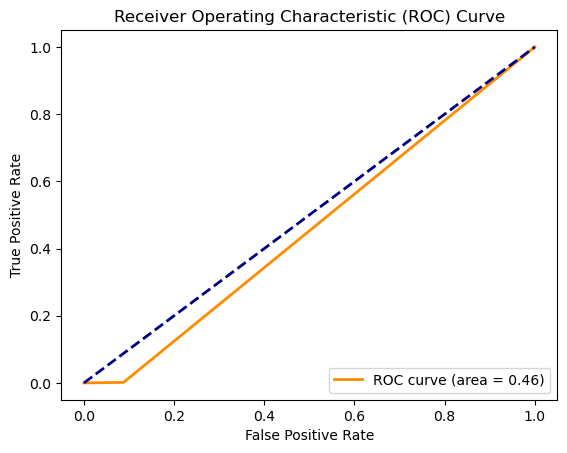

In [42]:
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def show_cyto():
    plt.imshow(cv2.cvtColor(cyto, cv2.COLOR_BGR2RGB))
    plt.title('Watershed Segmentation (Cytoplasm)')
    plt.show()


def threshold_mask(mask, threshold=0.5):
    return (mask > threshold).astype(int)

ground_truth_mask = cv2.imread('C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/y_new/106.bmp', cv2.IMREAD_GRAYSCALE)
cyto = watershed_segmentation_blue(filtered_images_channels_b)

if ground_truth_mask.shape != cyto.shape:
    cyto = cv2.resize(cyto, (ground_truth_mask.shape[1], ground_truth_mask.shape[0]))

y_true = threshold_mask(ground_truth_mask)
y_pred = threshold_mask(cyto)

print("Shape of y_true:", y_true.shape)
print("Shape of y_pred:", y_pred.shape)

min_shape = min(y_true.size, y_pred.size)
y_true = y_true.ravel()[:min_shape]
y_pred = y_pred.ravel()[:min_shape]

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()


accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)


show_cyto()


# Print the results
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Nucleus segmentation using green channel watershed algorithm

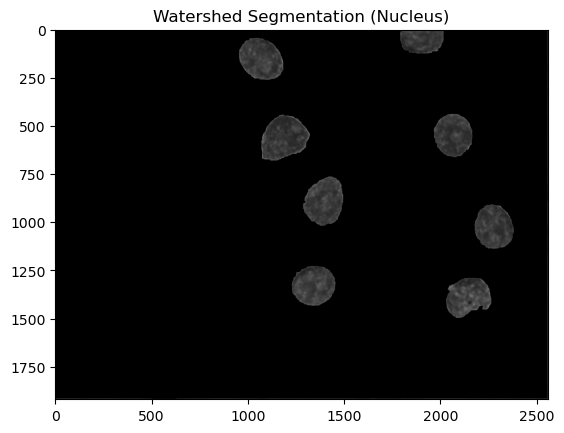

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply watershed segmentation on the green channel
def watershed_segmentation_green(image):
    if len(image.shape) == 2:
        g = image
    elif len(image.shape) == 3 and image.shape[2] == 3:
        _, g, _ = cv2.split(image)
    else:
        raise ValueError("Invalid image format")
    image_rgb = cv2.cvtColor(g, cv2.COLOR_GRAY2BGR)
    _, thresh = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    _, markers = cv2.connectedComponents(sure_fg)

    markers = markers + 1

    markers[unknown == 255] = 0

    cv2.watershed(image_rgb, markers)

    image_rgb[markers == 1] = [0, 0, 0] 

    return image_rgb

green_segmented = watershed_segmentation_green(filtered_images_channels_g)
plt.imshow(cv2.cvtColor(green_segmented, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation (Nucleus)')
plt.show()


Shape of y_true: (1920, 2560)
Shape of y_pred: (1920, 2560, 3)
True Positive (TP): 273
True Negative (TN): 4321688
False Positive (FP): 415695
False Negative (FN): 177544
Accuracy: 0.8793052164713542
Precision: 0.0006563004846526656
AUC: 0.45689373638472935


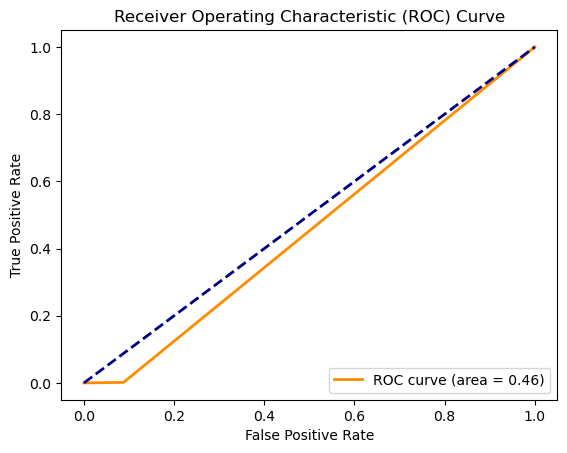

In [18]:
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def threshold_mask(mask, threshold=0.5):
    return (mask > threshold).astype(int)

ground_truth_mask = cv2.imread("C:/Users/Karthik/Desktop/Sem 4/SEM 5/Data DIP/TCIA_SegPC_dataset/train/nucleus_GT/106_.bmp", cv2.IMREAD_GRAYSCALE)
neu = green_segmented

if ground_truth_mask.shape != green_segmented.shape:
    neu = cv2.resize(neu, (ground_truth_mask.shape[1], ground_truth_mask.shape[0]))

y_true = threshold_mask(ground_truth_mask)
y_pred = threshold_mask(neu)

print("Shape of y_true:", y_true.shape)
print("Shape of y_pred:", y_pred.shape)

min_shape = min(y_true.size, y_pred.size)
y_true = y_true.ravel()[:min_shape]
y_pred = y_pred.ravel()[:min_shape]

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)


print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
